In [4]:
# !brew install openjdk@17 Mac only
# start neo server
!pip install neo4j

In [2]:
from neo4j import GraphDatabase

class GraphBuilder:
    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()

    def delete_all(self):
        with self._driver.session() as session:
            session.write_transaction(self._delete_all)
            
    @staticmethod
    def _delete_all(tx):
        query = "MATCH (n) DETACH DELETE n"
        tx.run(query)

    def create_nodes_and_relationships(self):
        with self._driver.session() as session:
            session.write_transaction(self._create_nodes_and_relationships)

    @staticmethod
    def _create_nodes_and_relationships(tx):
        # Create nodes
        query = (
            "CREATE (alice:Person {name: 'Alice', age: 30}), "
            "(bob:Person {name: 'Bob', age: 35}), "
            "(eve:Person {name: 'Eve', age: 25}), "
            "(python:Language {name: 'Python'}), "
            "(java:Language {name: 'Java'}) "
            "RETURN alice, bob, eve, python, java"
        )
        tx.run(query)

        # Create relationships
        query = (
            "MATCH (alice:Person {name: 'Alice'}), "
            "(bob:Person {name: 'Bob'}), "
            "(eve:Person {name: 'Eve'}), "
            "(python:Language {name: 'Python'}), "
            "(java:Language {name: 'Java'}) "
            "CREATE (alice)-[:KNOWS]->(bob), "
            "(alice)-[:KNOWS]->(eve), "
            "(alice)-[:LIKES]->(python), "
            "(bob)-[:LIKES]->(java)"
        )
        tx.run(query)

# Initialize the GraphBuilder class
graph_builder = GraphBuilder("bolt://localhost:7687", "neo4j", "eternal-pyramid-corner-jester-bread-6973")

# Delete all existing nodes and relationships
graph_builder.delete_all()

# Create new nodes and relationships
graph_builder.create_nodes_and_relationships()

# Close the connection
graph_builder.close()

print("Knowledge Graph created!")


/var/folders/xg/br01pwxs0bj606x9ssl7_hzw0000gn/T/ipykernel_80141/1348757667.py:12: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(self._delete_all)
/var/folders/xg/br01pwxs0bj606x9ssl7_hzw0000gn/T/ipykernel_80141/1348757667.py:21: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(self._create_nodes_and_relationships)


Knowledge Graph created!


In [9]:
!pip install networkx matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/f6/22/9c31044ff7339c63727a135872e5cb59564f11625372a81c3eebf148f4af/matplotlib-3.7.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/88/e3/696e96ee197b1f60242d12b215332af9fc1961c81990c8b5630b89b34ce6/contourpy-1.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/1f/80/c5ce42faa7dec3c22fe587e56e141c7416c19a13a96bd4972bf1b55cb494/fonttools-4.42.1-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 6.8 MB/s eta 0:00:00
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/4a/fe/23d7fa78f7c66086d196406beb1fb2eaf629dd7adc01c3453033303d17fa/kiwisolver-1

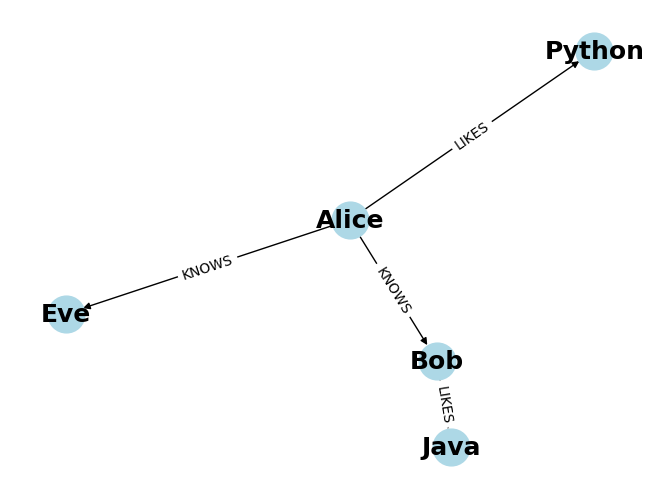

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to visualize the graph
def visualize_graph(edges):
    G = nx.DiGraph()
    for edge in edges:
        G.add_edge(edge[0], edge[1], relationship=edge[2])
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700, font_size=18)
    
    edge_labels = nx.get_edge_attributes(G, 'relationship')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.show()

# Define the edges based on relationships in the Neo4j database
# The format is (Start Node, End Node, Relationship)
edges = [
    ("Alice", "Bob", "KNOWS"),
    ("Alice", "Eve", "KNOWS"),
    ("Alice", "Python", "LIKES"),
    ("Bob", "Java", "LIKES")
]

visualize_graph(edges)


In [12]:
!pip install streamlit pydeck
